# <center>Challenge 1<center>

<p>Team Name:CK
<p>Student Names: Austin Freeman and Cameron Tharpe
<p>Student W#s:W0652871 and W0668972

## Instructions
Use generic coding style unless hard-coded values are really necessary.<br>
Your code must be efficient and use self-explanatory naming.<br>
Use appropriate Python library methods for each task instead of using loops.<br>
Run your entire code and save. Then submit this <b>saved</b> copy.

## Imports

In [885]:
import array as arr
import random
from sklearn import preprocessing
import numpy as np
import math
import pandas as pd

from sklearn.preprocessing import MinMaxScaler, StandardScaler, scale
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import chi2_contingency
from matplotlib import pyplot as plt

# PART I

## Prepare Data

<b>A. Create a data set D with 100 data points with the following attributes (features) as such:</b>

a1 is from a normal distribution N(mean=20,var=4)<br>
a2 is from a uniform distribution U(min=14,max=26)<br>

In [886]:
#Creating data set D with a1 and a2

D = []
for i in range(100):
    a1 = (np.random.normal(loc=20, scale=(4), size=None))
    a2 = (np.random.uniform(low=14, high=26))
    D.append([a1,a2])

#print("D:")
#D

## Explore Data

Apply min-max scaling to D, P1:

In [887]:
Min_Max = MinMaxScaler()
Min_Max.fit(D)

P1 = Min_Max.transform(D)
#print("P1: \n", P1)

Apply std-mean scaling to D, P2

In [888]:
std_Scale = StandardScaler()
std_Scale.fit(D)

P2 = std_Scale.transform(D)
#print("P2: \n", P2)

Apply min-max scaling to P1, P3:

In [889]:
#Min-Maxing P1 will return original data set prior to first Min-Max

Min_Max_2 = MinMaxScaler()
Min_Max_2.fit(P1)

P3 = Min_Max_2.transform(D)
#print("P3: \n", P3) 

Plot P1, P2, and P3 for each attribute on a separate chart. Each sub-plot must be side-by-side:

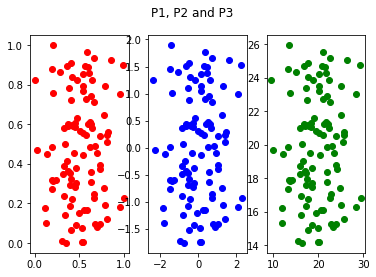

In [890]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3)
fig.suptitle("P1, P2 and P3")

ax1.scatter(*zip(*P1), color = 'red')
ax2.scatter(*zip(*P2), color = 'blue')
ax3.scatter(*zip(*P3), color = 'green')

Compare P1 and P3. Discuss the relation between P1 and P3:

After P1 was Min-Max scaled, all of the data was placed between 0 and 1, where 0 is the minimum value for both x and y values. Min-Max scaling P1 gave us P3. After this scaling, P3 became the original data for P1 before scaling.

# PART II

## Prepare Data

b1 = 2*a1<br>
b2 = normal distribution N(mean=40,var=4)<br>
Pr(b1,b2) = {(b1, b2)}, data objects with class positive<br>
P = Rotate(Pr,45), rotate Pr by 45 degrees in counter-clockwise<br>
Nr = Shift(Pr,x,20), shift in X-dimension by 20 units towards right, data objects with class negative<br>
N = Rotate(Nr,45), rotate Nr by 45 degrees in counter-clockwise<br>

In [891]:
#creating b1 and b2
Pre = []
for i in range(0,len(D)):
    b1 = ((D[i][0]) * 2)
    b2 = (np.random.normal(loc=40, scale=(4), size=None))
    Pre.append([b1,b2])
    
Pr = np.array(Pre)
#print("Pr: \n", Pr)

###


###Rotating Pr
def rotation(degrees):
    theta = np.radians(degrees)
    
    rMatrix = np.array( ((np.cos(theta), -np.sin(theta)), (np.sin(theta), np.cos(theta)) ))
    return rMatrix

P_rotate = rotation(45)

P = []
for i in range(0, len(Pr)):
    P.append(P_rotate.dot(Pr[i]))
P = np.array(P)
#print("\nP (Pr rotated 45 deg counter-clockwise): \n", pd.DataFrame(P))

###


### Shifting Pr 20 units in the x-direction
Nr = []
for i in range(0, len(Pr)):
    a = Pr[i][0] + 20
    b = Pr[i][1]
    Nr.append([a,b])

Nr = np.array(Nr)
#print("\nNr: \n", Nr)
###


### Rotating Nr 45 degrees counter-clockwise
N_rotate = rotation(45)

N=[]
for i in range(0, len(Nr)):
    N.append(N_rotate.dot(Nr[i]))
N = np.array(N)
#print("\nN (Nr rotated 45 deg counter-clockwise): \n", pd.DataFrame(N))

###

## Scaling

Apply scaling to P by min-max to [0, 1], P1:

In [892]:
Min_Max_P = MinMaxScaler()
Min_Max_P.fit(P)

P1 = Min_Max_P.transform(P)
#print("P1: \n", P1)

Apply scaling to P by min-max to [-1, 1], P2:

In [893]:
Min_Max_Neg = MinMaxScaler(feature_range = (-1,1))
Min_Max_Neg.fit(P)

P2 = Min_Max_Neg.transform(P)
#print("P2: \n", P2)

Apply scaling to P by std-normal, P3:

In [894]:
P3 = scale(P, axis=0, with_std = True, with_mean = False)
#print("P3: \n", P3)

Apply scaling to N by min-max to [0, 1], N1:

In [895]:
Min_Max_N = MinMaxScaler()
Min_Max_N.fit(N)

N1 = Min_Max_N.transform(N)
#print("N1: \n", N1)

Apply scaling to N by min-max to [-1, 1], N2:

In [896]:
Min_Max_N2 = MinMaxScaler(feature_range = (-1,1))
Min_Max_N2.fit(N)

N2 = Min_Max_N2.transform(N)
#print("N2: \n", N2)

Apply scaling to N by std-normal, N3:

In [897]:
N3 = scale(N, axis=0, with_std = True, with_mean = False)
#print("N3: \n", N3)

## Visualize Data

Plot Pr, P, P1, P2, P3 in the same figure on a separate sub-plots of 2 by 3:

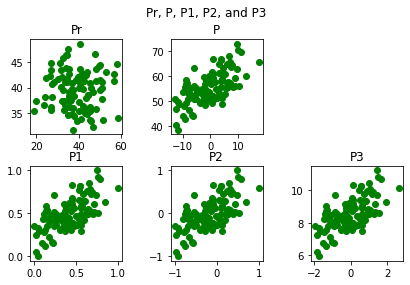

In [898]:
fig, axs = plt.subplots(2,3)
fig.suptitle("Pr, P, P1, P2, and P3")
fig.tight_layout()

axs[0,0].scatter(*zip(*Pr), color = 'green')
axs[0,0].set_title("Pr")
axs[0,1].scatter(*zip(*P), color = 'green')
axs[0,1].set_title("P")
axs[1,0].scatter(*zip(*P1), color = 'green')
axs[1,0].set_title("P1")
axs[1,1].scatter(*zip(*P2), color = 'green')
axs[1,1].set_title("P2")
axs[1,2].scatter(*zip(*P3), color = 'green')
axs[1,2].set_title("P3")
axs[0,2].set_visible(False)

Plot Nr, N, N1, N2, N3 in the same figure on a separate sub-plots of 2 by 3:

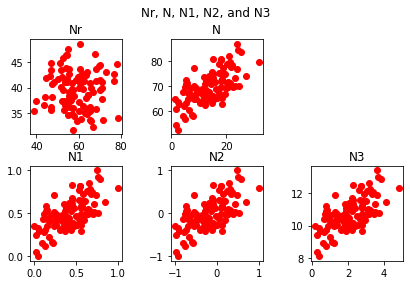

In [899]:
fig, axs = plt.subplots(2,3)
fig.suptitle("Nr, N, N1, N2, and N3")
fig.tight_layout()

axs[0,0].scatter(*zip(*Nr), color = 'red')
axs[0,0].set_title("Nr")
axs[0,1].scatter(*zip(*N), color = 'red')
axs[0,1].set_title("N")
axs[1,0].scatter(*zip(*N1), color = 'red')
axs[1,0].set_title("N1")
axs[1,1].scatter(*zip(*N2), color = 'red')
axs[1,1].set_title("N2")
axs[1,2].scatter(*zip(*N3), color = 'red')
axs[1,2].set_title("N3")
axs[0,2].set_visible(False)

## K-NN Classification

### Obtain 60% training dTrn, 20% validation dVal, 20% test dTst for each data set per class:

In [900]:
def getData(pInput,pRatio, class_):
    #complete as needed
    #return dTrn, dVal, dTst
    #pRatio = (0.6, 0.2, 0.3) as an example
    
    dTrn, dTstandVal = train_test_split(pInput, train_size = pRatio[0], test_size = 1-pRatio[0] )
    dTst, dVal = train_test_split(dTstandVal, train_size =.5, test_size = .5)
    
    for i in range(0,len(class_)):
        if(class_[i] == 'positive'):
            class_[i] = 0
        else:
            class_[i] = 1
    
    dTrn = pd.DataFrame(data = [dTrn.T[0], dTrn.T[1], class_[0:len(dTrn)]]).T
    dTst = pd.DataFrame(data = [dTst.T[0], dTst.T[1], class_[0:len(dTst)]]).T
    dVal = pd.DataFrame(data = [dVal.T[0], dVal.T[1], class_[0:len(dVal)]]).T
        
    return dTrn, dVal, dTst 


### Explore K-NN Classifiers

In [901]:
'''
Performance measures: Sensitivity, specificity, AUC, F1

Define a function knnClassifier(pTrn, pVal, pTst, eps, *kwargs)
k = 2
Loop: Increase k by 1 until the accuracy change is less than eps:<br>
   Generate Model
   Obtain contingency table based on validation data set
   Calculate accuracy over validation data set
   Calculate accuracy change "ac"
   if ac < eps:
       Obtain contingency table for testing data set
       Calculate performance measures for testing data set
       Plot ROC
       Plot accuracy-K chart
       return (k, performance measures, contingency table, others as needed)
   else:
       k = k + 1
   #
#   
'''

'\nPerformance measures: Sensitivity, specificity, AUC, F1\n\nDefine a function knnClassifier(pTrn, pVal, pTst, eps, *kwargs)\nk = 2\nLoop: Increase k by 1 until the accuracy change is less than eps:<br>\n   Generate Model\n   Obtain contingency table based on validation data set\n   Calculate accuracy over validation data set\n   Calculate accuracy change "ac"\n   if ac < eps:\n       Obtain contingency table for testing data set\n       Calculate performance measures for testing data set\n       Plot ROC\n       Plot accuracy-K chart\n       return (k, performance measures, contingency table, others as needed)\n   else:\n       k = k + 1\n   #\n#   \n'

In [906]:
def knnClassifier(pTrn, pVal, pTst, eps, *kwargs):
    #complete as needed
    #return the model and performance measures

    k_iters = 2
    looper = True
    prev_Acc = 100.1
    k_List = []
    acc_List = []
    while(looper):
        k_Neighbor = KNeighborsClassifier(n_neighbors = k_iters, weights = 'distance', algorithm = 'auto', p = 2)
        k_Neighbor_fit = k_Neighbor.fit(pTrn,pTrn.iloc[:,2])
        
        #Predicting based on validation
        pVal_results = k_Neighbor.predict(pVal)
        #print(pVal_results)
        
        # Creating contingency table for validation and placing into DataFrame for reading
        #con_Table_pVal = pd.DataFrame(chi2_contingency(pVal), index = ['Chi^2 Stat', 'P Value', 'Degrees of Freedom','Expected Frequencies'])
        con_Table_pVal = pd.crosstab(pVal_results, pVal.iloc[:,2])
        con_Table_pVal = con_Table_pVal.T
        #con_Table_pVal.rename(columns = {'Chi^2 Stat', 'P Value', 'Degrees of Freedom','Expected Frequencies'}, inplace = True)
        print(display(con_Table_pVal))
        
        #Calculating accuracy and accuracy change
        accuracy = k_Neighbor.score(pVal, pVal.iloc[:,2])
        acc_Change = prev_Acc - accuracy
        
        acc_List.append(accuracy)
        print("Accuracy for iteration " + str(k_iters) + ":",accuracy)
        
        k_List.append(k_iters)
        
        if(acc_Change < eps and k_iters != 2):
            #Predicting against Test
            pTst_results = k_Neighbor.predict(pTst)
            
            #Creating contingency table for test and placing into DataFrame for reading
            #con_Table_pTst = pd.DataFrame(chi2_contingency(pTst), index = ['Chi^2 Stat', 'P Value', 'Degrees of Freedom','Expected Frequencies'])
            con_Table_pTst = pd.crosstab(pTst_results, pTst.iloc[:,2])
            con_Table_pTst = con_Table_pTst.T
            print(display(con_Table_pTst), "\n")
            
            #Calculate Specificity and Sensitivity
            tn, fp, fn, tp = metrics.confusion_matrix(pTst.iloc[:,2], pTst_results).ravel()
            spec = tn/(tn + fp)
            sens = tp/(tp + fn)
            print("Specificity is", spec)
            print("Sensitivity is", sens)
            
            #Finding AUC
            false_Pos, true_Pos, thresh = metrics.roc_curve(pTst.iloc[:,2],pTst_results)
            auc = metrics.auc(false_Pos, true_Pos)
            print("Area Under ROC curve:", auc)
            
            #Finding F1
            f1_score = metrics.f1_score(pTst.iloc[:,2],pTst_results)
            print("F1 Score:", f1_score)
            
            #Plotting ROC
            metrics.plot_roc_curve(k_Neighbor_fit,pTst, pTst.iloc[:,2])
            plt.show()
            
            #Plotting accuracy-k
            plt.title("Accuracy-K chart")
            plt.plot(k_List,acc_List)
            plt.xlabel("K Iterations")
            plt.xlim(2,k_iters)
            plt.ylabel("Accuracy")
            plt.ylim(0.7, 1)
            plt.show()
            
            looper = False
        else:
            prev_Acc = accuracy
            k_iters = k_iters + 1
            

### Run experiments for each data set {(Pr, Nr), (P, N), (P1, N1), (P2, N2), (P3, N3)}

In [903]:
'''
For each data set (Pi, Ni)
   Get training, validation, test data sets
   Find the best model
   Obtain contingency table
   Calculate performance measures for the test data set
   Plot ROC
   Plot accuracy-K chart
'''

'\nFor each data set (Pi, Ni)\n   Get training, validation, test data sets\n   Find the best model\n   Obtain contingency table\n   Calculate performance measures for the test data set\n   Plot ROC\n   Plot accuracy-K chart\n'

Data Set: Pr and Nr


row_0,0.0,1.0
2,,
0.0,20,0
1.0,3,17


None
Accuracy for iteration 2: 0.925


row_0,0.0,1.0
2,,
0.0,19,1
1.0,3,17


None
Accuracy for iteration 3: 0.9


row_0,0.0,1.0
2,,
0.0,19,1
1.0,3,17


None
Accuracy for iteration 4: 0.9


row_0,0.0,1.0
2,,
0.0,16,4
1.0,3,17


None 

Specificity is 0.8
Sensitivity is 0.85
Area Under ROC curve: 0.8250000000000001
F1 Score: 0.8292682926829269


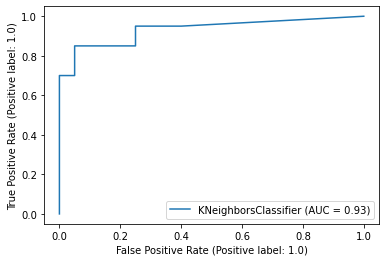

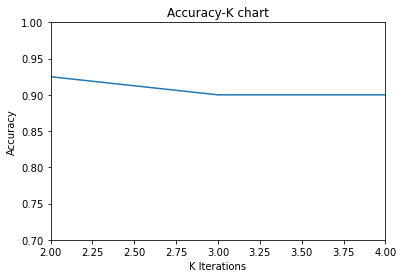

Data Set: P and N


row_0,0.0,1.0
2,,
0.0,17,3
1.0,3,17


None
Accuracy for iteration 2: 0.85


row_0,0.0,1.0
2,,
0.0,18,2
1.0,1,19


None
Accuracy for iteration 3: 0.925


row_0,0.0,1.0
2,,
0.0,19,1
1.0,4,16


None 

Specificity is 0.95
Sensitivity is 0.8
Area Under ROC curve: 0.875
F1 Score: 0.8648648648648648


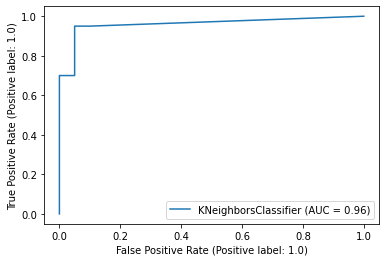

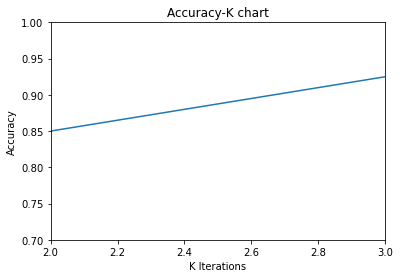

Data Set: P1 and N1


row_0,0.0,1.0
2,,
0.0,20,0
1.0,0,20


None
Accuracy for iteration 2: 1.0


row_0,0.0,1.0
2,,
0.0,20,0
1.0,0,20


None
Accuracy for iteration 3: 1.0


row_0,0.0,1.0
2,,
0.0,20,0
1.0,0,20


None 

Specificity is 1.0
Sensitivity is 1.0
Area Under ROC curve: 1.0
F1 Score: 1.0


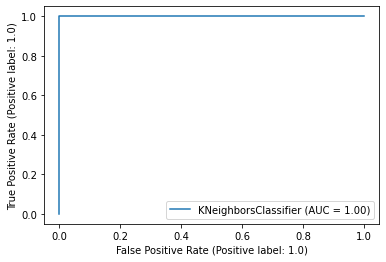

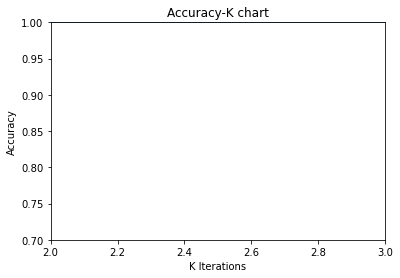

Data Set: P2 and N2


row_0,0.0,1.0
2,,
0.0,20,0
1.0,0,20


None
Accuracy for iteration 2: 1.0


row_0,0.0,1.0
2,,
0.0,20,0
1.0,0,20


None
Accuracy for iteration 3: 1.0


row_0,0.0,1.0
2,,
0.0,20,0
1.0,0,20


None 

Specificity is 1.0
Sensitivity is 1.0
Area Under ROC curve: 1.0
F1 Score: 1.0


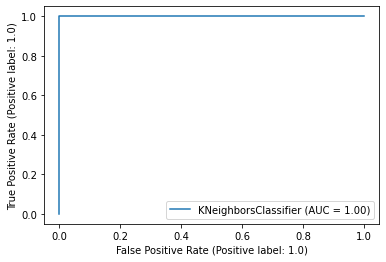

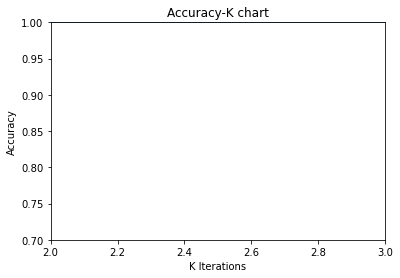

Data Set: P3 and N3


row_0,0.0,1.0
2,,
0.0,20,0
1.0,0,20


None
Accuracy for iteration 2: 1.0


row_0,0.0,1.0
2,,
0.0,20,0
1.0,0,20


None
Accuracy for iteration 3: 1.0


row_0,0.0,1.0
2,,
0.0,19,1
1.0,0,20


None 

Specificity is 0.95
Sensitivity is 1.0
Area Under ROC curve: 0.975
F1 Score: 0.975609756097561


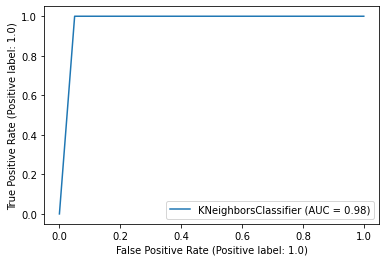

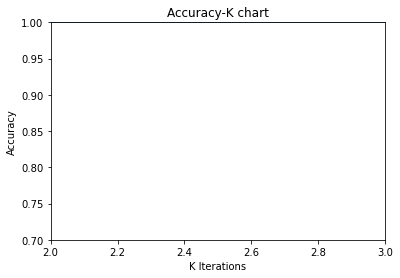

In [911]:
data = [Pr, Nr, P, N, P1, N1, P2, N2, P3, N3]
data_name = ['Pr', 'Nr', 'P', 'N', 'P1', 'N1', 'P2', 'N2', 'P3', 'N3']

for i in range(0,len(data),2):
    pdTrn, pdVal, pdTst = getData(data[i], [0.6, 0.2, 0.2], ['positive']*100)
    ndTrn, ndVal, ndTst = getData(data[i+1], [0.6, 0.2, 0.2], ['negative']*100)

    pTrn = pd.concat([pdTrn, ndTrn])
    pVal = pd.concat([pdVal, ndVal])
    pTst = pd.concat([pdTst, ndTst])
    
    print("Data Set: "+ data_name[i] + " and " + data_name[i+1])
    
    knnClassifier(pTrn,pVal,pTst,0.01)

## Discussion
Discuss how scaling affects the classification performance of K-NN classifier based on each performance measures 

Pr and Nr:
    These 2 are different data sets that were not scaled, therefore there was no effect.

P and N:
    For these, all we did was rotate Pr and Nr, so the data sets were still different and therefore.
    
P1 and N1, P2 and N2, P3 and N3:
    For each accompaning set, scaling the data between 0 and 1 or -1 and 1 made the x demension shifting negligable in the resulting sets. Therefore the P sets and the N sets were equivalent. Because these sets were basically equivalent, the KNN Classifier was essentially guessing with a 50% chance for each.

## <center> REFERENCES </center>
List resources (book, internet page, etc.) that you used to complete this challenge.

https://www.w3schools.com/python/python_ml_train_test.asp
https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html?highlight=split#sklearn.model_selection.train_test_split
https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier.fit
https://www.datacamp.com/community/tutorials/k-nearest-neighbor-classification-scikit-learn
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html
https://stackoverflow.com/questions/31324218/scikit-learn-how-to-obtain-true-positive-true-negative-false-positive-and-fal
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.auc.html
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html#sklearn.metrics.roc_auc_score
https://stackoverflow.com/questions/25009284/how-to-plot-roc-curve-in-python
https://www.pluralsight.com/guides/data-visualization-deep-learning-model-using-matplotlib